In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

from data_loading import get_movielens_data
from evaluation import evaluate_policy, create_offline_dataset
from policies.bcmabrp import BCMABRP
from policies.cbrap import CBRAP
from policies.linucb import LinUCB
from policies.linear_ts import LinearTS
from policies.random import RandomPolicy
from policies.egreedy import EGreedy
from reduct_matrix import get_reduct_matrix

from sklearn.model_selection import train_test_split

In [4]:
PROJECT_DIR = '.'

In [5]:
# Reproducibility
seed = 42
np.random.seed(seed)

In [6]:
total_start_ts = time.time()

In [7]:
data = get_movielens_data()
(
    actions, action_features, action_biases, user_stream, true_user_features, user_features, user_biases, reward_list, ratings_list
) = data

In [8]:
ratings_list

,user_id,item_id,rating
0,36955,1079,3.0
1,36955,47,5.0
2,36955,21,3.0
3,35139,19,4.0
4,35435,21,5.0
...,...,...,...
6747778,63100,4816,3.5
6747779,63100,410,3.5
6747780,63100,231,3.5
6747781,63100,2478,3.5


In [9]:
ratings_list.rating.min(), ratings_list.rating.max()

(0.5, 5.0)

In [10]:
times = 100000

In [11]:
list(map(lambda x: x/ 2, range(1, 11)))

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [12]:
thresholds = list(map(lambda x: x/ 2, range(1, 11)))
mean_rews = np.zeros(shape=(len(thresholds), len(actions)))
for i, threshold in enumerate(thresholds):
    data = get_movielens_data(threshold)
    (
        actions, action_features, action_biases, user_stream, true_user_features,
        user_features, user_biases, reward_list, ratings_list
    ) = data
    off_ctx, off_rew, contexts, rewards = create_offline_dataset(
        times, actions, action_features, user_stream, user_features, reward_list
    )
    mean_rew = rewards.mean(axis=0).flatten()
    mean_rews[i, :] = mean_rew
    del data
    del off_ctx, off_rew, contexts, rewards

First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in

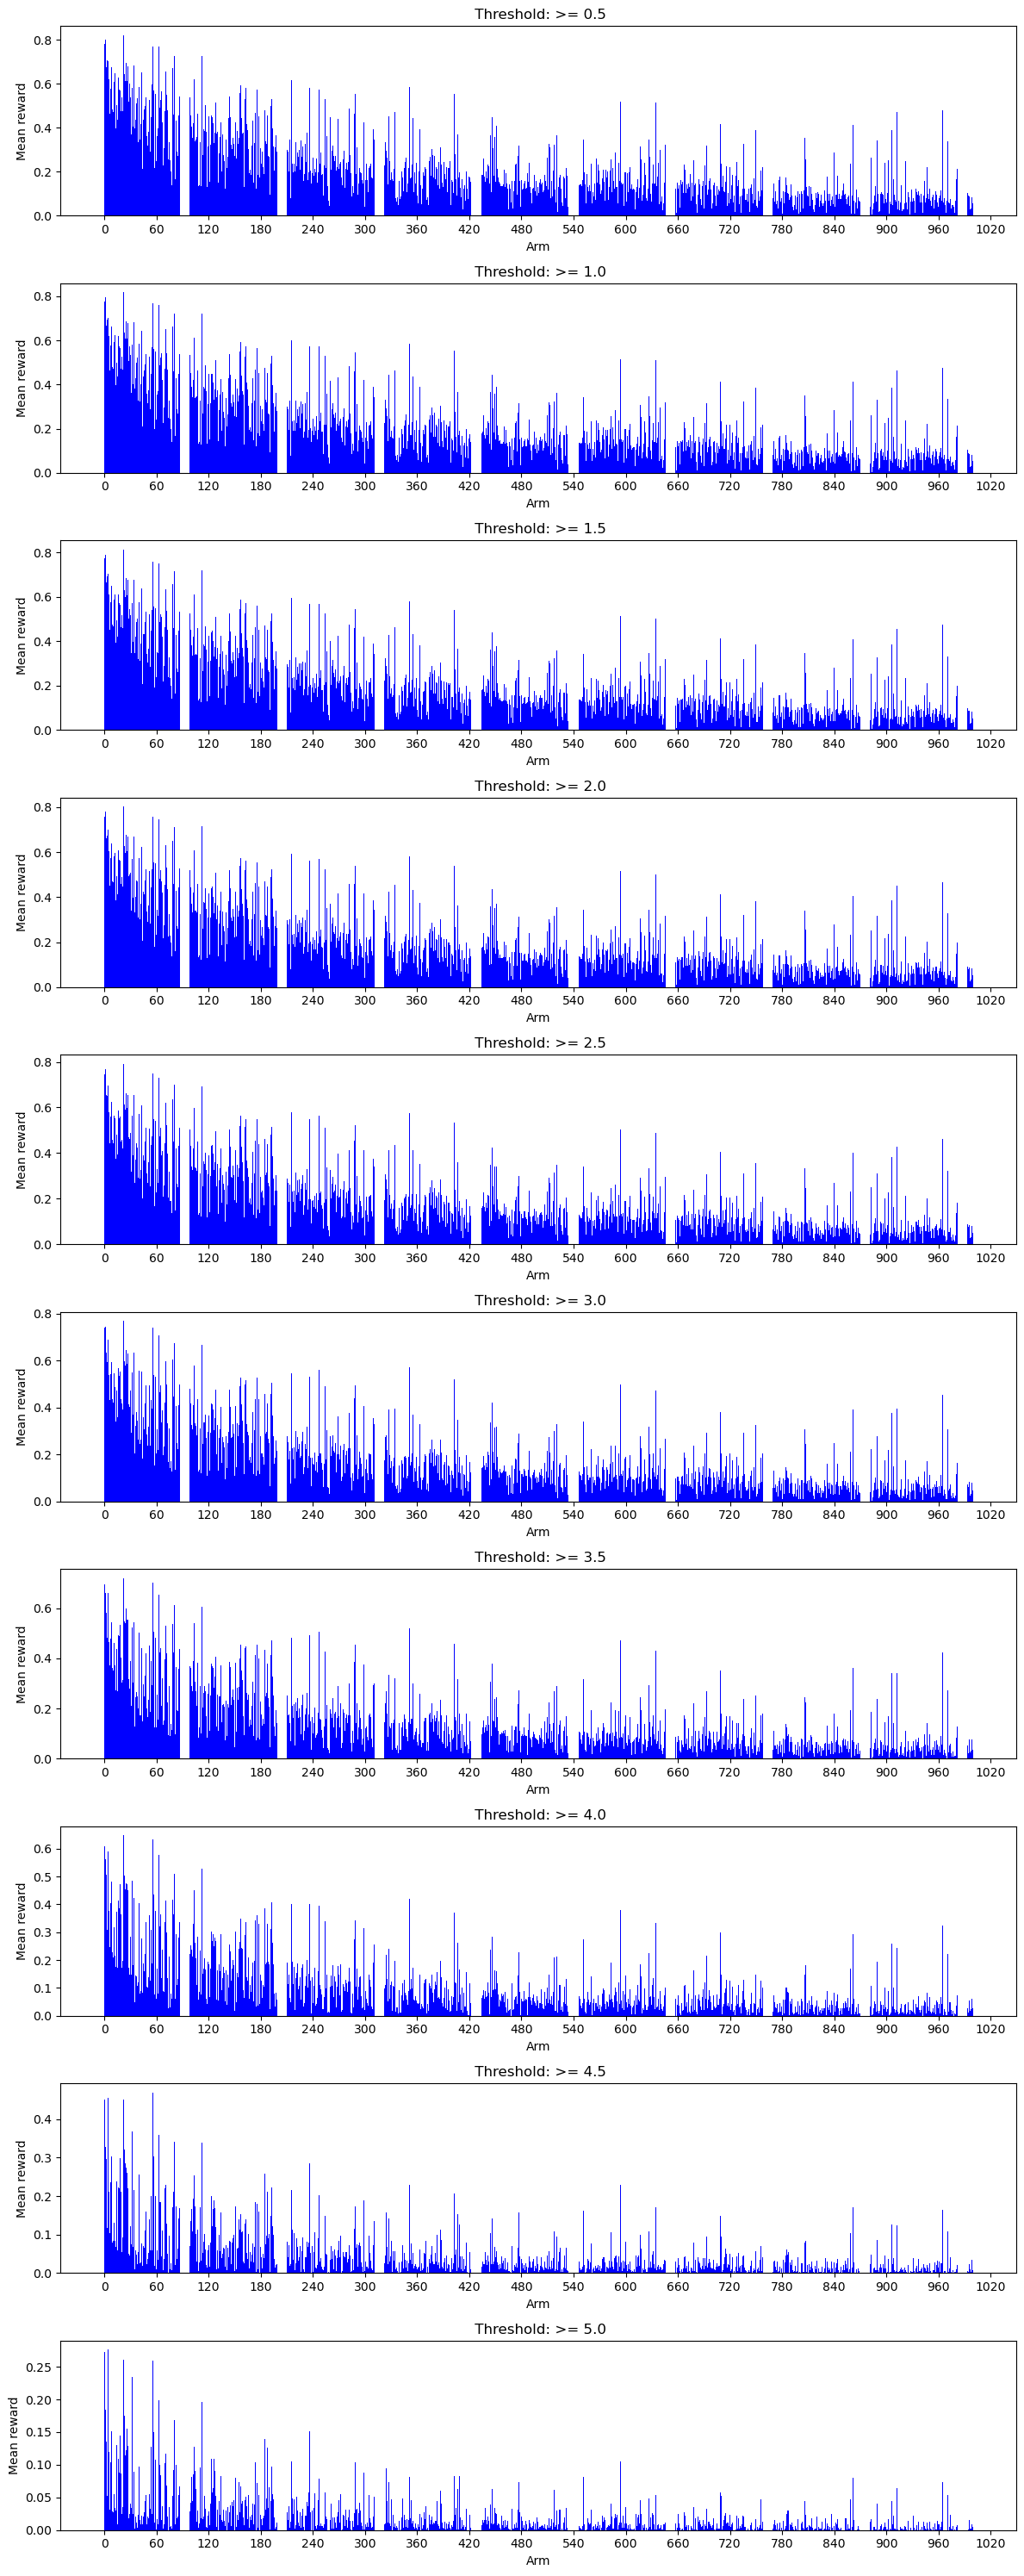

In [18]:
fig, axs = plt.subplots(len(thresholds), 1, figsize=(12, 3*len(thresholds)))

for i, ax in enumerate(axs):
    ax.bar(x=list(range(len(mean_rews[i, :]))), height=mean_rews[i, :], color='b', width=0.9)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.set_xlabel('Arm')
    ax.set_ylabel('Mean reward');
    ax.set_title(f" Threshold: >= {thresholds[i]}")
    
plt.tight_layout()
plt.show()

In [17]:
mean_rews.shape

(10, 1000)

In [14]:
print(f"Total time is {datetime.timedelta(seconds=time.time() - total_start_ts)}")

Total time is 0:36:44.805027
